In [24]:
# !pip install Matplotlib
# !Pip install scipy

In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

file_1 = "Resources/Mouse_metadata.csv"
file_2 = "Resources/Study_results.csv"

mouse_df = pd.read_csv(file_1)
results_df = pd.read_csv(file_2)

results_df.head()

merged_df = pd.merge(results_df, mouse_df, on="Mouse ID", how="left")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
mouse_count = len(merged_df['Mouse ID'].unique())

print(mouse_count)


249


In [27]:
duplicates = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'],keep=False)]


duplicates


# duplicate_mouse_ids = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
data_g989 = merged_df.loc[merged_df["Mouse ID"] == "g989", :]

data_g989



# duplicate_mouse_data = merged_df.loc[merged_df["Mouse ID"] == "g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
new_merg_df = merged_df.copy()
new_merg_df.drop(new_merg_df[new_merg_df['Mouse ID'] == 'g989'].index, inplace = True) 
new_merg_df

# merged_df= merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
# merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [30]:
new_m_count = len(new_merg_df['Mouse ID'].unique())

print(new_m_count)

248


In [31]:
v_df = new_merg_df.copy()

mean = v_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = v_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = v_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
s_deviation = v_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = v_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

sum_table_df = pd.DataFrame({"Mean Tumor Volume": mean,
                            "Median Tumor Volume": median,
                            "Tumor Volume Variance": variance,
                            "Tumor Volume Std. Dev.": s_deviation,
                            "Tumor Volume Std. Err.": sem})

sum_table_df

#c_df =v_df.set_index('Drug Regimen')
# _df = c_df["Drug Regimen"].unique()
# print(_df)

#v3_df = c_df.groupby('Tumor Volume (mm3)').mean()

#c_df = v_df.groupby('Drug Regimen')

# mean = c_df['Tumor Volume (mm3)'].mean()
# median = c_df['Tumor Volume (mm3)'].median()
# mode = c_df['Tumor Volume (mm3)'].mode()
# variance = c_df['Tumor Volume (mm3)'].var()
# s_deviation = c_df['Tumor Volume (mm3)'].std()
# sem = c_df['Tumor Volume (mm3)'].sem()

# mean = v3_df.mean()
# median = v3_df.median()
# #mode = v3_df.mode(dropna=False)
# variance = v3_df.var()
# s_deviation = v3_df.std()
# sem = v3_df.sem()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
drug_df = new_merg_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})

print(drug_df)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


Text(0, 0.5, 'Number of Data Points')

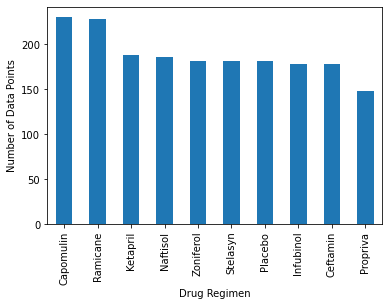

In [33]:
mice_per_treatment = new_merg_df["Drug Regimen"].value_counts()

mice_per_treatment.plot(kind = 'bar')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


#mice_per_treatment

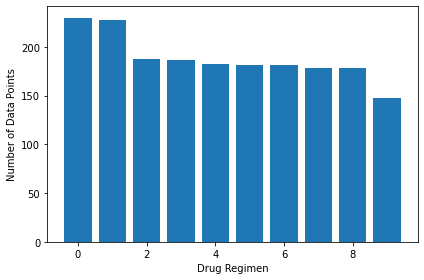

In [34]:
# mice_counts = 

#mice_treatment_2 = new_merg_df.groupby('Drug Regimen')
#mice_counts = mice_treatment_2.size()
#mice_counts = new_merg_df["Drug Regimen"].value_counts()

#mice_treatment_2.plot(kind = 'bar')

# mice_treatment_2.counts.index.values
# mice_treatment_2.counts.values
# plt.bar(counts.index.values, mice_counts)
#xticks = new_merg_df["Drug Regimen"].unique()
mice_treatment_2 = new_merg_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(mice_treatment_2))

plt.bar(x_axis, mice_treatment_2)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# plt.set_xticklabels(new_merg_df["Drug Regimen"], rotation=45)
plt.tight_layout()
# tick_locations = [value for value in new_merg_df["Drug Regimen"]]
# plt.xticks(tick_locations, new_merg_df["Drug Regimen"],rotation="vertical")

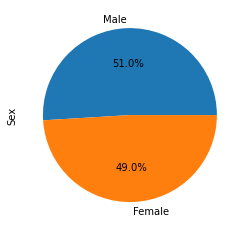

In [35]:
mice_sex = new_merg_df["Sex"].value_counts()

labels = ["Male", "Female"]
mice_sex.plot(kind = 'pie', autopct="%1.1f%%")



Text(0.5, 1.0, 'Sex')

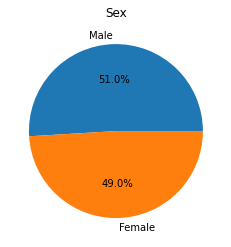

In [36]:
mice_sex = new_merg_df["Sex"].value_counts()

labels = ["Male", "Female"]
plt.pie(mice_sex, labels=labels, autopct="%1.1f%%")
plt.title('Sex')

In [37]:
#mice = new_merg_df["Mouse ID"].unique()
               
    
capo_mice = new_merg_df.loc[new_merg_df["Drug Regimen"] == "Capomulin",:]


mouse_data = new_merg_df.loc[new_merg_df["Mouse ID"] == "i557", :]

mouse_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
246,i557,0,45.000000,0,Capomulin,Female,1,24
365,i557,5,42.261665,0,Capomulin,Female,1,24
574,i557,10,42.992077,0,Capomulin,Female,1,24
860,i557,15,43.529876,0,Capomulin,Female,1,24
1052,i557,20,43.967895,0,Capomulin,Female,1,24
1157,i557,25,44.596219,0,Capomulin,Female,1,24
1309,i557,30,45.261384,0,Capomulin,Female,1,24
1573,i557,35,45.941949,0,Capomulin,Female,1,24
1712,i557,40,46.821070,1,Capomulin,Female,1,24
1878,i557,45,47.685963,1,Capomulin,Female,1,24


In [38]:

m_id = new_merg_df.groupby (['Mouse ID']).max()

new_m_id = m_id.reset_index()

new_m_id = new_m_id.drop(columns=['Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'])

new_df = pd.merge(new_m_id, new_merg_df, on=["Mouse ID", "Timepoint"], how="left")


#new_m_id = ['Mouse ID'], ["Timepoint"]
#print(new_m_id.head())

new_df. head()

# new df with only timepoint, merge timepoint df on two things, 'mouse ID' & 'timepoint', how=left


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [39]:


regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol = []

quartiles = new_df.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

for regimen in regimen_list:
    #cap_drug = new_df.loc[new_df['Drug Regimen'] == "Capomulin" & new_df['Tumor Volume (mm3)']] #locate just tumor vol for each
    final_tumor_vol = new_df.loc[new_df["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']
    tumor_vol.append(final_tumor_vol)
#     cap_drug = new_df.loc[new_df['Drug Regimen'] == "Capomulin"].groupby('Tumor Volume (mm3)')
#     ram_drug = new_df.loc[new_df['Drug Regimen'] == "Ramicane"].groupby('Tumor Volume (mm3)') 
#     inf_drug = new_df.loc[new_df['Drug Regimen'] == "Infubinol"].groupby('Tumor Volume (mm3)') 
#     cef_drug = new_df.loc[new_df['Drug Regimen'] == "Ceftamin"].groupby('Tumor Volume (mm3)') 

#print (quartiles)
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
    
# tumor_vol.append(['cap_drug'])
# tumor_vol.append(['ram_drug'])
# tumor_vol.append(['inf_drug'])
# tumor_vol.append(['cef_drug']) 
quartiles = final_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
print(f"{regimen}'s potential outliers: {outliers}") 
    
    

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


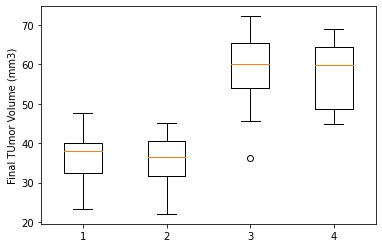

In [40]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final TUmor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.show()

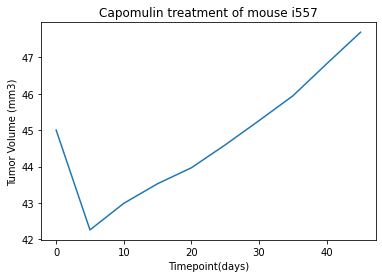

In [41]:
#time = mouse_data["Timepoint"].unique()

time = mouse_data["Timepoint"]

tumor_v = mouse_data["Tumor Volume (mm3)"]

plt.plot(time, tumor_v)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse i557")
plt.show()

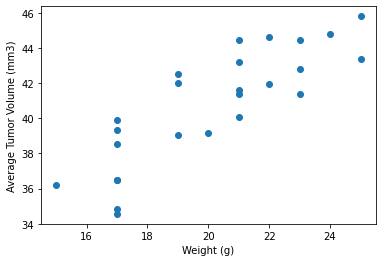

In [42]:

# capo_mice = new_merg_df.loc[new_merg_df["Drug Regimen"] == "Capomulin",:]
# id_mice = capo_mice.loc[capo_mice["Mouse ID"] != '1']

# mouse_weight = id_mice["Weight (g)"]
# avg_tumor = id_mice.groupby(["Tumor Volume (mm3)"]).mean()
# m_tumor_vol = id_mice["Tumor Volume (mm3)"]


# #avg_tumor = m_tumor_vol.mean()
# #plt.scatter(mouse_weight, avg_tumor)
# print (avg_tumor)

#avg_tumor = id_mice(["Tumor Volume (mm3)"])

#avg_tumor = new_merg_df.groupby(['Mouse ID']).mean()



#avg_tumor = id_mice["Tumor Volume (mm3)"].mean()
#avg_vol = np.append(avg_tumor)
#print(id_mice)
#avg_tumor = tumor_vol.mean()



#plt.scatter(avg_tumor["Weight (g)"], avg_tumor[('Tumor Volume (mm3)')])



#plt.scatter(mouse_weight, avg_tumor)
# plt.xlabel("Weight (g)")
# plt.ylabel("Average Tumor Volume (mm3)")
# plt.show()

#avg_tumor.shape


capomulin_table = merged_df.loc[merged_df['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()